In [1]:
!pip install pandas openpyxl
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

Looking in indexes: https://pypi.doubanio.com/simple


In [1]:
import pandas as pd

# 加载Excel文件
file_path = 'Diabetes.xlsx'  # 文件路径
df = pd.read_excel(file_path)



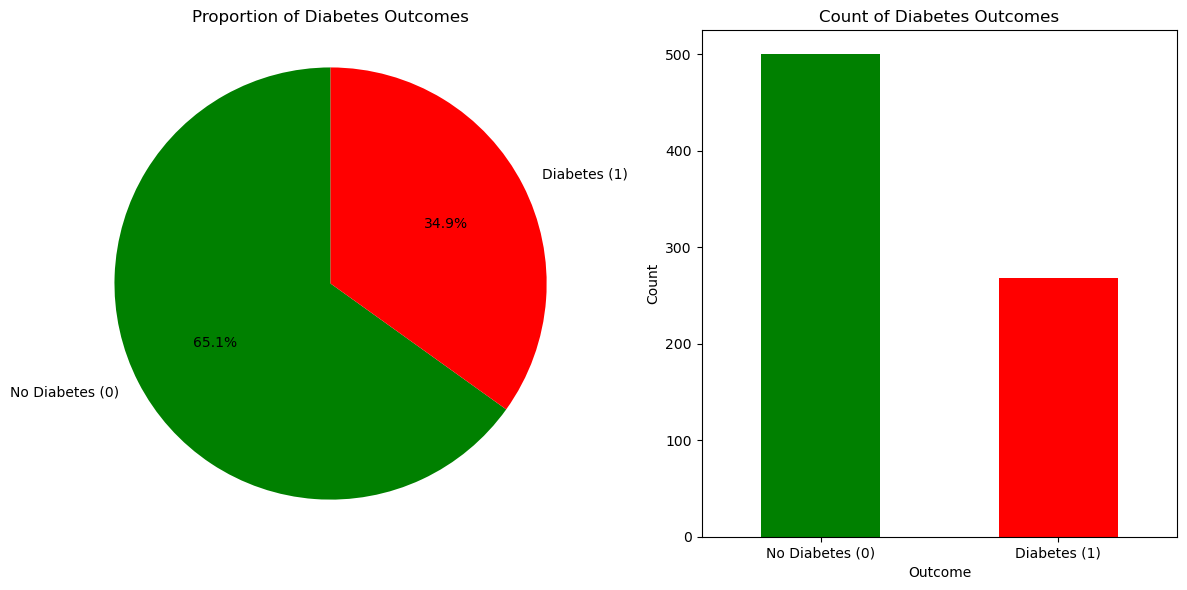

In [5]:
import matplotlib.pyplot as plt
outcome_counts = df['Outcome'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 绘制饼图
axes[0].pie(outcome_counts, labels=['No Diabetes (0)', 'Diabetes (1)'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
axes[0].set_title('Proportion of Diabetes Outcomes')
axes[0].axis('equal')  # 使饼图为圆形

# 绘制条形图
outcome_counts.plot(kind='bar', ax=axes[1], color=['green', 'red'])
axes[1].set_title('Count of Diabetes Outcomes')
axes[1].set_xlabel('Outcome')
axes[1].set_ylabel('Count')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No Diabetes (0)', 'Diabetes (1)'], rotation=0)

# 显示图形
plt.tight_layout()
plt.show()


In [6]:


# 打印具体数量
print("具体数量:")
print(outcome_counts)


具体数量:
0    500
1    268
Name: Outcome, dtype: int64


In [16]:
import pandas as pd



# 定义一个函数来删除异常值
def remove_outliers_iqr(dataframe):
    # 计算Q1和Q3
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3 - Q1

    # 定义异常值的条件
    condition = ~((dataframe < (Q1 - 1.5 * IQR)) | (dataframe > (Q3 + 1.5 * IQR))).any(axis=1)

    # 返回没有异常值的数据
    return dataframe[condition]

# 删除异常值
df_cleaned = remove_outliers_iqr(df)

# 输出清理后的数据
print("Original Data Shape:", df.shape)
print("Cleaned Data Shape:", df_cleaned.shape)

# 可选：将清理后的数据保存到新的Excel文件
df_cleaned.to_excel('cleaned_data.xlsx', index=False)

Original Data Shape: (768, 9)
Cleaned Data Shape: (639, 9)


In [17]:
desc_stats = df_cleaned.describe()

In [18]:
df_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [19]:
data_without_last_column = df_cleaned.iloc[:, :-1]

# Calculate the threshold for missing values (10%)
threshold = 0.10 * data_without_last_column.shape[0]

# Identify columns to drop
columns_to_drop = data_without_last_column.columns[data_without_last_column.isnull().sum() > threshold]

# Drop the identified columns
data = df_cleaned.drop(columns=columns_to_drop)

# Output the names of the dropped columns
print("Dropped columns with more than 10% missing values:")
print(columns_to_drop.tolist())

# Display the cleaned dataset
print(data)

Dropped columns with more than 10% missing values:
[]
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0          

In [20]:
output_file_path = 'descriptive_statistics.xlsx'
desc_stats.to_excel(output_file_path)

print(f"Descriptive statistics saved to {output_file_path}")

Descriptive statistics saved to descriptive_statistics.xlsx


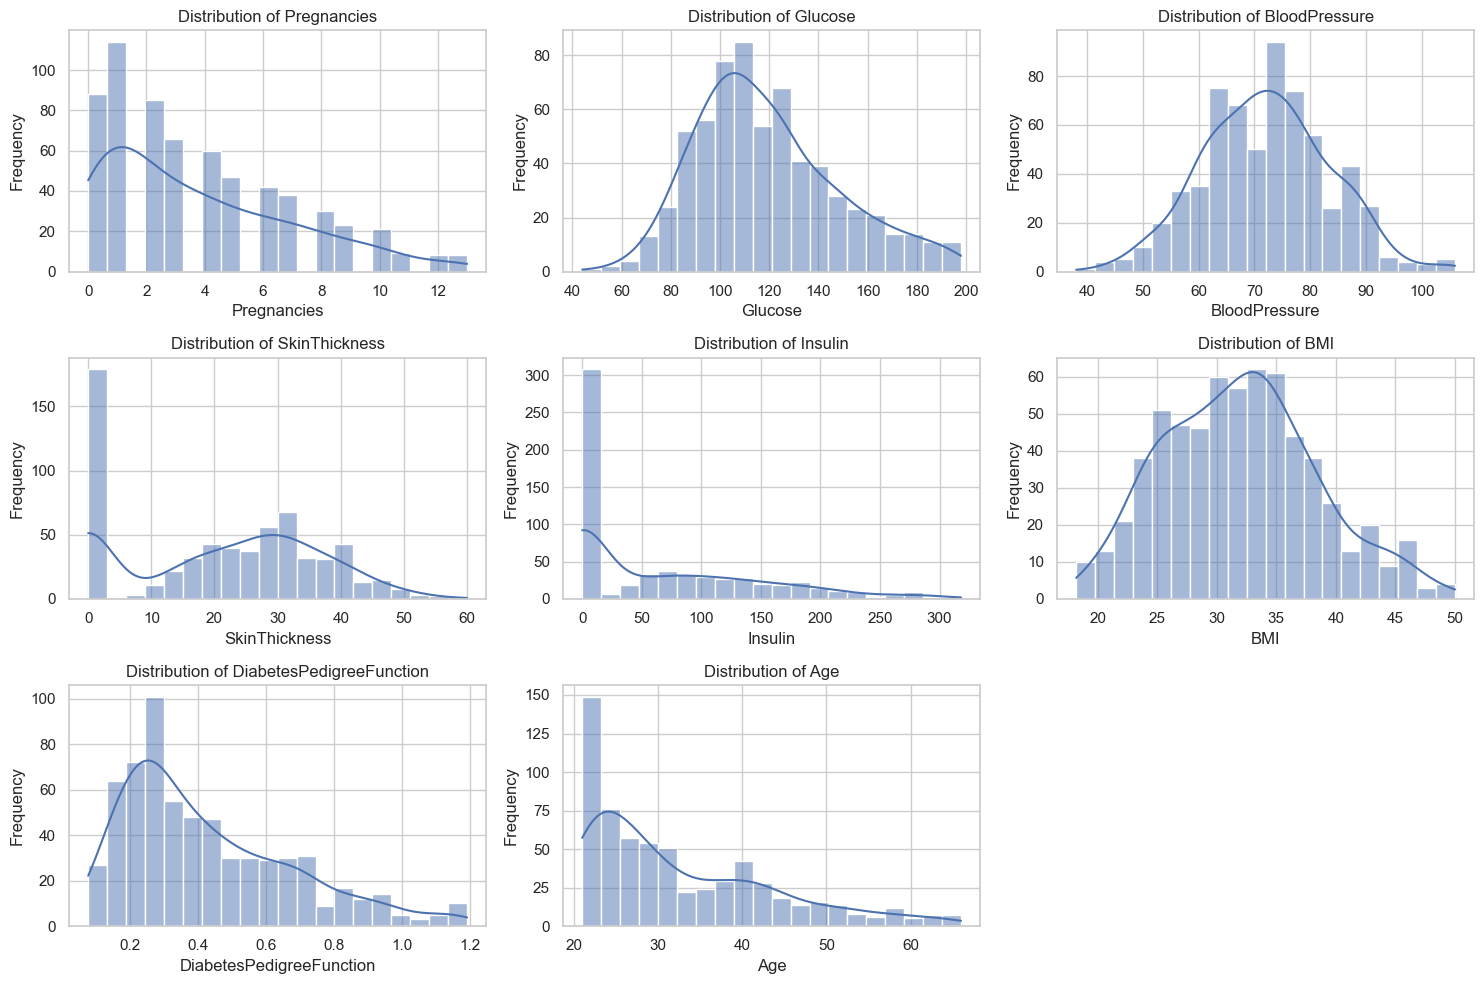

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# 设置绘图风格
sns.set(style="whitegrid")

# 创建一个绘图区域
plt.figure(figsize=(15, 10))
features = df_cleaned.iloc[:, :-1]  # 选择所有行，除了最后一列
# 绘制每个特征的分布图
for i, column in enumerate(features.columns, 1):
    plt.subplot(3, 3, i)  # 3行3列的子图
    sns.histplot(features[column], kde=True, bins=20)  # 绘制直方图和核密度估计
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()  # 调整子图间距


# 保存为 JPG 文件
plt.savefig('feature_distributions.jpg', format='jpg', dpi=300)  # 保存图片，dpi可调节清晰度
plt.show()  # 显示图形（可选）

In [22]:
correlation_matrix = df_cleaned.corr()

# 保存相关性矩阵到新的Excel文件
output_file_path = 'correlation_matrix.xlsx'
correlation_matrix.to_excel(output_file_path)

print(f"Correlation matrix saved to {output_file_path}")


Correlation matrix saved to correlation_matrix.xlsx


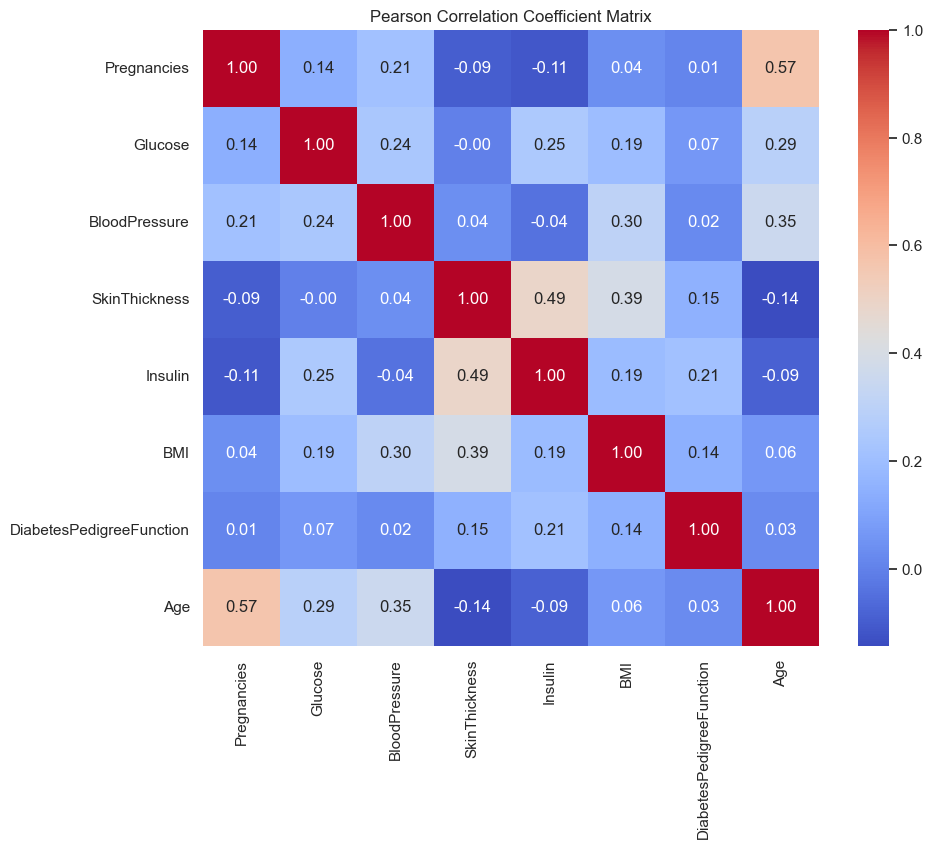

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_excel('cleaned_data.xlsx')

# 计算皮尔逊相关系数
correlation_matrix = data.iloc[:, :-1].corr(method='pearson')

# 绘制热图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Pearson Correlation Coefficient Matrix')
plt.show()

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

# 读取数据
data = pd.read_excel('cleaned_data.xlsx')

# 将特征和目标变量分开
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 创建随机森林模型
model1 = RandomForestClassifier(random_state=42)

# 交叉验证
cv_scores = cross_val_score(model1, X_train, y_train, cv=5, scoring='accuracy')

# 训练模型
model1.fit(X_train, y_train)

# 预测
y_pred = model1.predict(X_test)

# 计算评估指标
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model1.predict_proba(X_test)[:, 1])

# 输出结果
print(f'Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test F1 Score: {f1:.4f}')
print(f'Test ROC AUC: {roc_auc:.4f}')

Cross-Validation Accuracy: 0.7417 ± 0.0262
Test Accuracy: 0.7969
Test F1 Score: 0.5937
Test ROC AUC: 0.8708


In [50]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

model2 = LogisticRegression(random_state=42, max_iter=200)

# 交叉验证
cv_scores = cross_val_score(model2, X_train, y_train, cv=5, scoring='accuracy')

# 训练模型
model2.fit(X_train, y_train)

# 预测
y_pred = model2.predict(X_test)

# 计算评估指标
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model2.predict_proba(X_test)[:, 1])

# 输出结果
print(f'Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test F1 Score: {f1:.4f}')
print(f'Test ROC AUC: {roc_auc:.4f}')

Cross-Validation Accuracy: 0.7768 ± 0.0545
Test Accuracy: 0.8281
Test F1 Score: 0.6207
Test ROC AUC: 0.8530


In [51]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=5)  # 你可以调整n_neighbors的值

# 交叉验证
cv_scores = cross_val_score(model3, X_train, y_train, cv=5, scoring='accuracy')

# 训练模型
model3.fit(X_train, y_train)

# 预测
y_pred = model3.predict(X_test)

# 计算评估指标
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model3.predict_proba(X_test)[:, 1])

# 输出结果
print(f'Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test F1 Score: {f1:.4f}')
print(f'Test ROC AUC: {roc_auc:.4f}')

Cross-Validation Accuracy: 0.7320 ± 0.0466
Test Accuracy: 0.8047
Test F1 Score: 0.6032
Test ROC AUC: 0.8575


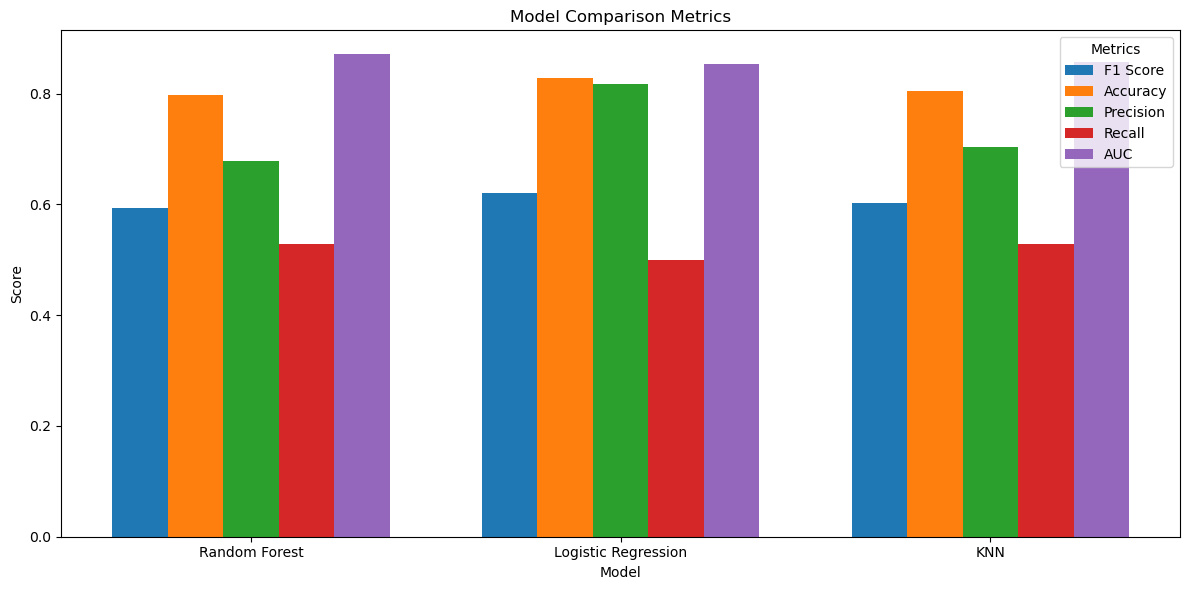

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

# 假设你有已训练好的模型和测试集
# model1, model2, model3: 你的训练好的模型
# X_test: 测试特征集
# y_test: 测试标签集

# 列出模型
models = {
    "Random Forest": model1,
    "Logistic Regression": model2,
    "KNN": model3
}

# 存储评估指标
metrics = {
    "Model": [],
    "F1 Score": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "AUC": []
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    # 对于AUC，需要预测概率
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = y_pred  # 处理不支持概率预测的模型

    metrics["Model"].append(model_name)
    metrics["F1 Score"].append(f1_score(y_test, y_pred))
    metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["Precision"].append(precision_score(y_test, y_pred))
    metrics["Recall"].append(recall_score(y_test, y_pred))
    metrics["AUC"].append(roc_auc_score(y_test, y_proba))

# 转换为numpy数组以便绘图
metrics_array = np.array([metrics["F1 Score"], metrics["Accuracy"], metrics["Precision"], metrics["Recall"], metrics["AUC"]])

# 绘制条形图
bar_width = 0.15
x = np.arange(len(metrics["Model"]))

plt.figure(figsize=(12, 6))

for i in range(len(metrics_array)):
    plt.bar(x + i * bar_width, metrics_array[i], width=bar_width, label=list(metrics.keys())[i + 1])

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison Metrics')
plt.xticks(x + bar_width * (len(metrics_array) - 1) / 2, metrics["Model"])
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

# 假设你有已训练好的模型和测试集
# model1, model2, model3: 你的训练好的模型
# X_test: 测试特征集
# y_test: 测试标签集

# 列出模型
models = {
    "Model 1": model1,
    "Model 2": model2,
    "Model 3": model3
}

# 存储评估指标
metrics = {
    "Model": [],
    "F1 Score": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "AUC": []
}

# 计算指标
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    # 对于AUC，需要预测概率
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = y_pred  # 处理不支持概率预测的模型

    metrics["Model"].append(model_name)
    metrics["F1 Score"].append(f1_score(y_test, y_pred))
    metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["Precision"].append(precision_score(y_test, y_pred))
    metrics["Recall"].append(recall_score(y_test, y_pred))
    metrics["AUC"].append(roc_auc_score(y_test, y_proba))

# 创建DataFrame
metrics_df = pd.DataFrame(metrics)

# 打印表格
print(metrics_df)


     Model  F1 Score  Accuracy  Precision    Recall       AUC
0  Model 1  0.593750  0.796875   0.678571  0.527778  0.870773
1  Model 2  0.620690  0.828125   0.818182  0.500000  0.852959
2  Model 3  0.603175  0.804688   0.703704  0.527778  0.857488


In [54]:
!pip install numpy matplotlib scikit-learn


Looking in indexes: https://pypi.doubanio.com/simple


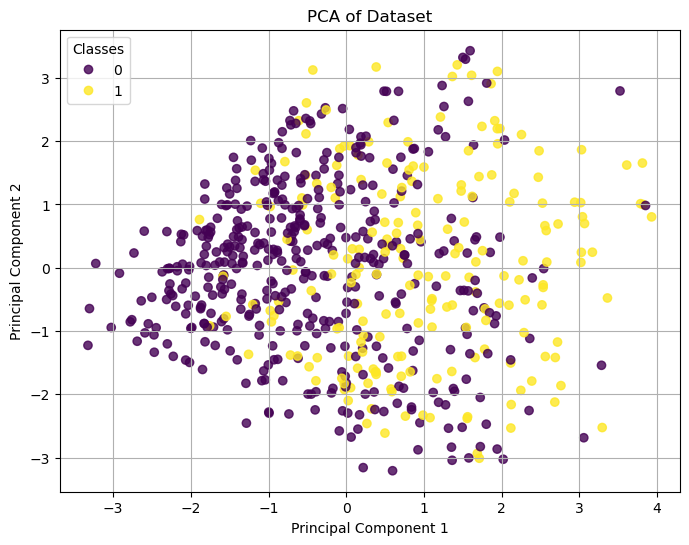

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # 降到二维
X_pca = pca.fit_transform(X_scaled)  # 可以使用标准化后的数据

# 可视化结果
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.8)

# 添加图例
plt.legend(*scatter.legend_elements(), title="Classes")

plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

最佳 K 值: 18


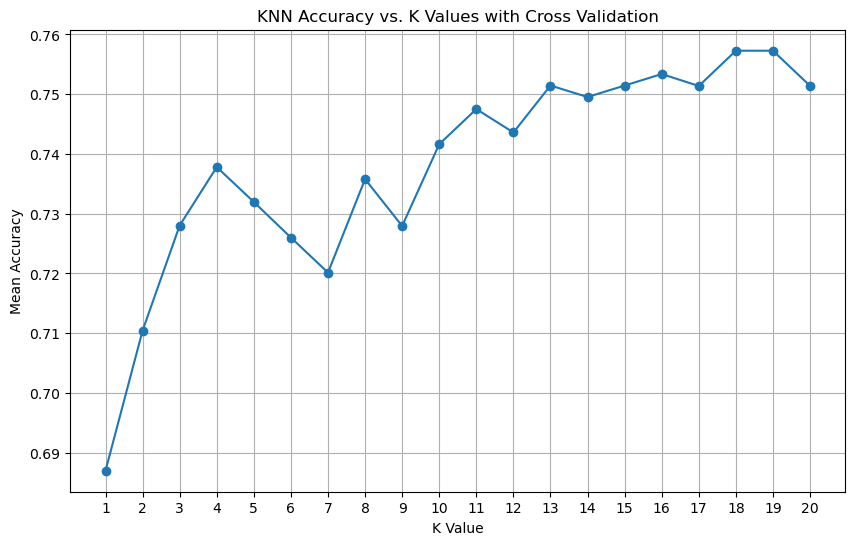

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# 读取数据
data = pd.read_excel('cleaned_data.xlsx')
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 选择 K 值的范围
k_values = range(1, 21)
mean_accuracies = []

# 评估不同的 K 值
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5 折交叉验证
    mean_accuracies.append(scores.mean())

# 找到最佳 K 值
best_k = k_values[np.argmax(mean_accuracies)]
print(f"最佳 K 值: {best_k}")

# 可视化 K 值与准确率
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_accuracies, marker='o')
plt.title('KNN Accuracy vs. K Values with Cross Validation')
plt.xlabel('K Value')
plt.ylabel('Mean Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

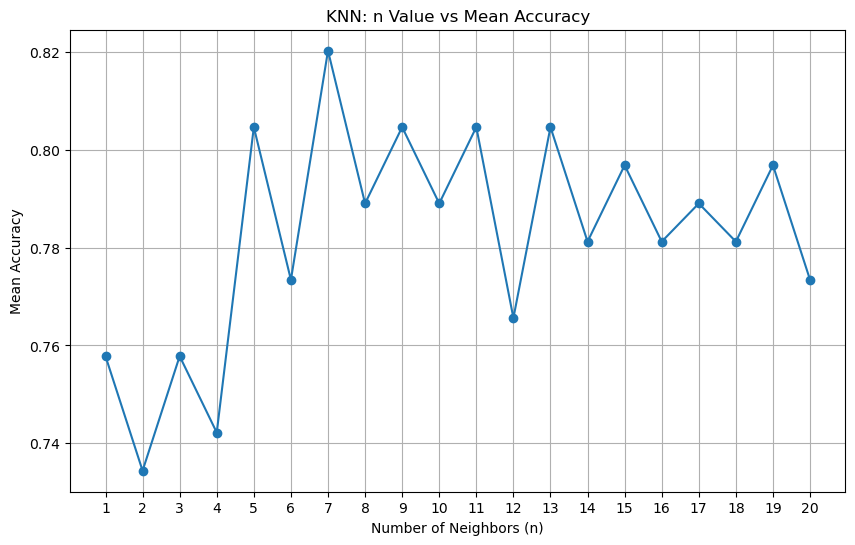

In [45]:
k_values = range(1, 21)  # 选择 K 值范围
mean_accuracies = []

# 评估不同的 K 值
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    mean_accuracies.append(accuracy)

# 可视化 K 值与平均准确率的关系
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_accuracies, marker='o')
plt.title('KNN: n Value vs Mean Accuracy')
plt.xlabel('Number of Neighbors (n)')
plt.ylabel('Mean Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()